In [1]:
from importlib import reload

In [2]:
from src.music.mir import MusicInformationRetreiver

mir = MusicInformationRetreiver(weights_path='mir_weights/')

/home/soroush/Projects/Folly/src/music/mir.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange
2024-08-20 21:23:31.654004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.5/lib64
2024-08-20 21:23:31.654031: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[   INFO   ] MusicExtractorSVM: no classifier models were configured by default
2024-08-20 21:23:32.211904: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 

In [3]:
# music_path = 'assets/Folly Audio/Meditation Music_moderatearousal.mp3'
music_path = 'assets/Radiohead - Everything in Its Right Place (Sam Goku Edit).mp3'
segments = mir(
    music_path, 
    segment_threshold=0.1, 
    genre_threshold=0.4, 
    inst_threshold=0.4, 
    add_segment_info=False
)

In [4]:
durations = [seg['duration'] for seg in segments]
durations, len(durations), sum(durations)

([41.056, 27.296, 33.824, 51.296, 20.704, 7.456, 43.52, 130.949], 8, 356.101)

In [5]:
import src.video.gen
reload(src.video.gen)
from src.video.gen import VideoGenerator



gen = VideoGenerator()

/home/soroush/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/soroush/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
/home/soroush/.venv/lib/python3.11/site-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoder

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.latent_consistency_models.pipeline_latent_consistency_img2img.LatentConsistencyModelImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.latent_consistency_models.pipeline_latent_consistency_text2img.LatentConsistencyModelPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [6]:
# del frames

import gc

gc.collect()

528

In [7]:
prompts = [
    "A bustling city street at dawn, with the first rays of sunlight reflecting off tall glass buildings.",
    "The city slowly wakes up as early morning commuters start to fill the streets, and shop signs begin to light up.",
    "Traffic increases, and the sound of honking cars and footsteps fills the air as the city becomes more alive.",
    "As the day progresses, the streets are filled with people, and the city hums with activity under the midday sun.",
    "A bustling marketplace opens, with vendors setting up stalls and people browsing through various goods.",
    "The afternoon brings a slight lull, with some people taking breaks in nearby parks, and the shadows grow longer.",
    "Clouds gather above the city, casting a grayish hue over the buildings, as the wind starts to pick up.",
    "As the evening approaches, the city is bathed in a soft golden light, with lights starting to twinkle in windows and on street signs."
]


frames = gen.generate(
    durations, 
    style='realistic',
    generation_fps=2,
    final_fps=30,
    width=512, 
    height=512,
    strength=0.4,
    prompts=prompts, 
    rotate_directions=None,
    zoom_directions=None,
    move_directions=None,
    zoom_factors=None,
    rotate_factors=None,
    move_factors=None,
    guidance_scale=8.,
    num_inference_steps=4,
    negative_prompt='blurry, fuzzy, low quality, chaotic, poor details, dark, sad, text, letters, alphabet',
    save_path='assets/radiohead-frames.pkl'
)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/723 [00:00<?, ?it/s]

In [ ]:
print('\n'.join(prompts)

In [8]:
gen.save_video(frames, music_path, 'test.mp4', fps=30)

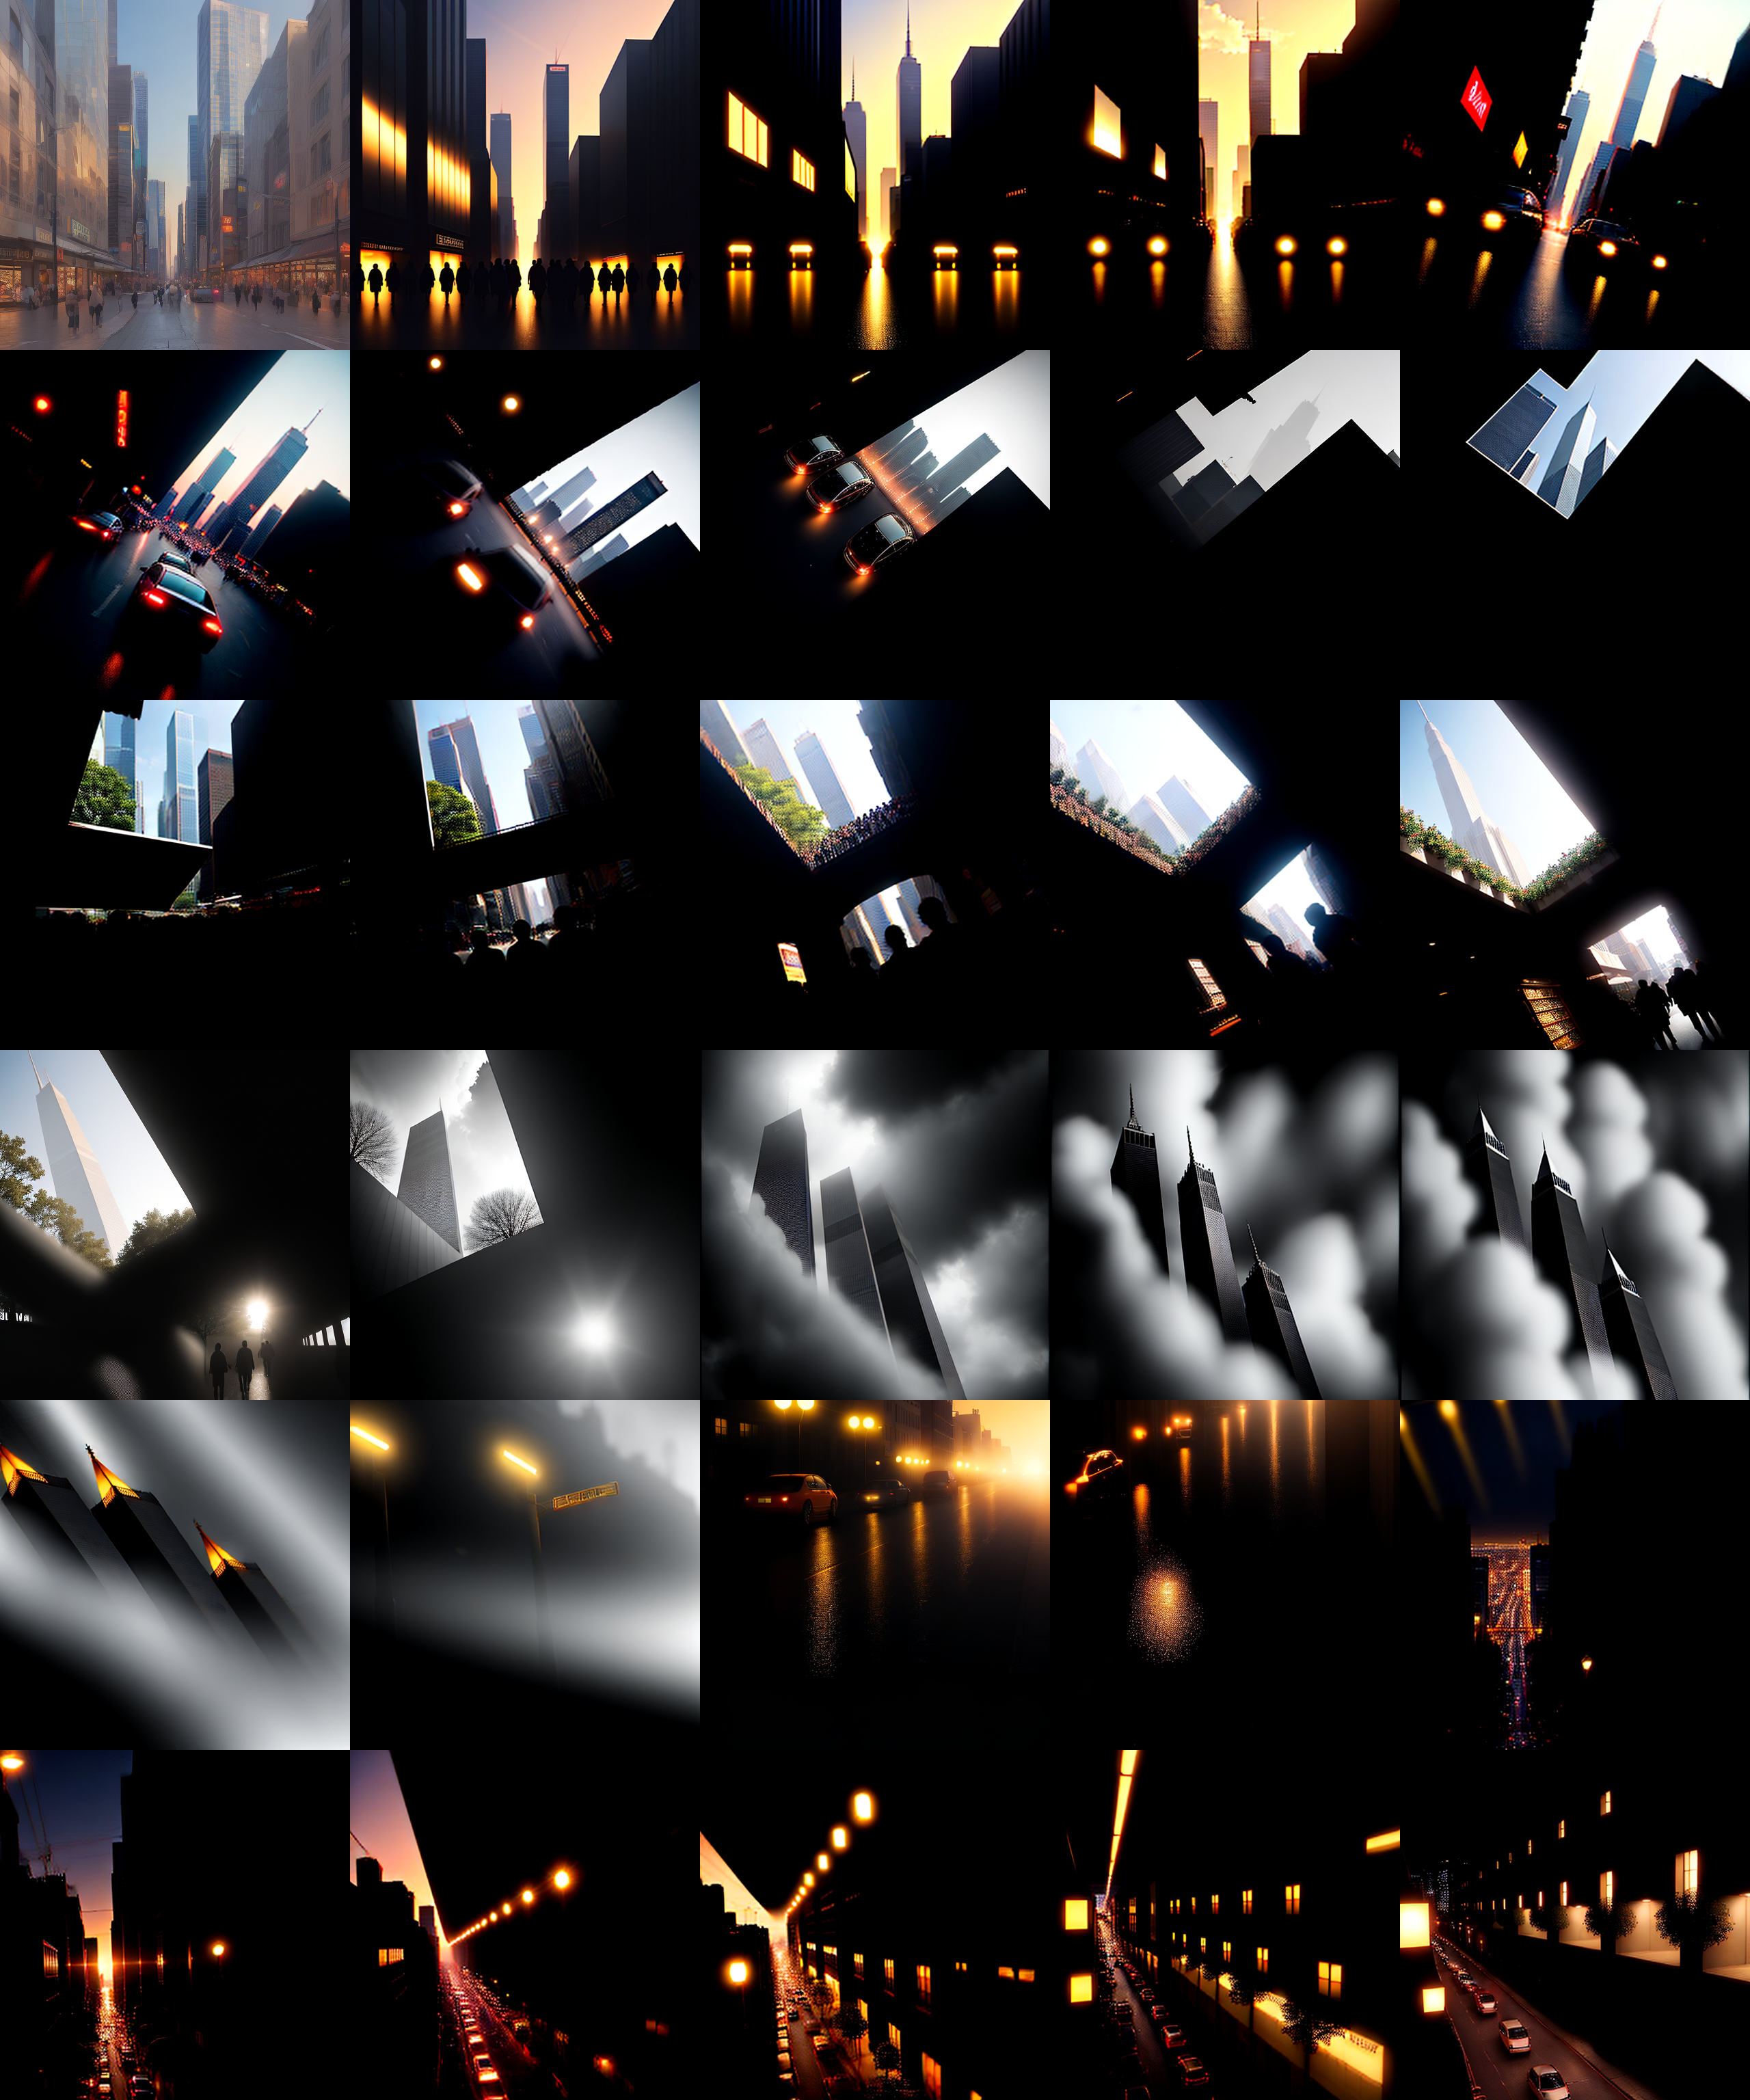

In [9]:
from diffusers.utils import make_image_grid

make_image_grid(frames[0:len(frames):len(frames)//30 + 1], rows=6, cols=5)